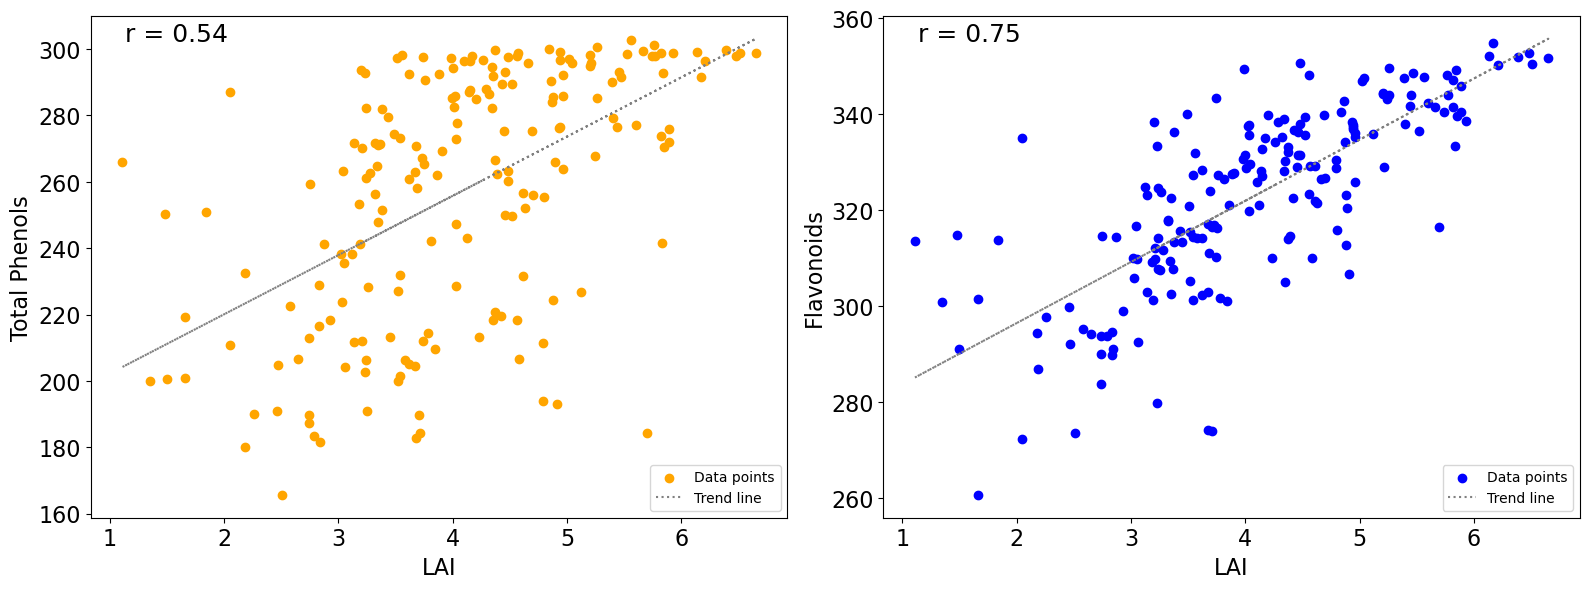

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
dataframe_path = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
df = pd.read_excel(dataframe_path)

# Prepare the feature and target variables
lai = df.iloc[:, 2]
flavonoids = df.iloc[:, 3]
phenolics = df.iloc[:, 4]

# Calculate correlations
correlation_f = stats.pearsonr(lai, flavonoids)[0]
correlation_p = stats.pearsonr(lai, phenolics)[0]

# Create a single figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Function to create scatter plot with trend line
def plot_scatter(ax, x, y, correlation, y_label, point_color, line_color):
    ax.scatter(x, y, color=point_color, label='Data points')
    ax.set_xlabel('LAI', fontsize=16)               # Increased font size
    ax.set_ylabel(y_label, fontsize=16)             # Increased font size
    ax.tick_params(axis='both', labelsize=16)       # Increased font size for ticks

    # Create trendline
    m, b = np.polyfit(x, y, 1)  # Fit line (y = mx + b)
    ax.plot(x, m*x + b, color=line_color, linestyle=':', label='Trend line')  # Dotted grey line

    # Annotations with increased font size
    ax.text(0.05, 0.95, f'r = {correlation:.2f}', transform=ax.transAxes, fontsize=18)  # Increased font size

    ax.legend(loc='lower right')
    ax.grid(False)

# Plot for Total Phenols on the left subplot (blue points)
plot_scatter(axs[0], lai, phenolics, correlation_p, 'Total Phenols', 'orange', 'grey')

# Plot for Flavonoids on the right subplot (orange points)
plot_scatter(axs[1], lai, flavonoids, correlation_f, 'Flavonoids', 'blue', 'grey')

# Adjust layout
plt.tight_layout()
plt.show()